In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("Training/0/Training_36001852.jpg")

In [4]:
img_array.shape #rgb

(48, 48, 3)

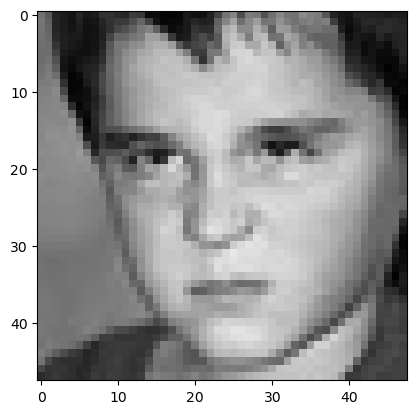

In [5]:
plt.imshow(img_array) #BGR

In [6]:
Datadirectory= "Training/" #training dataset

In [7]:
Classes = ["0","1","2","3","4","5","6"] #list of classes

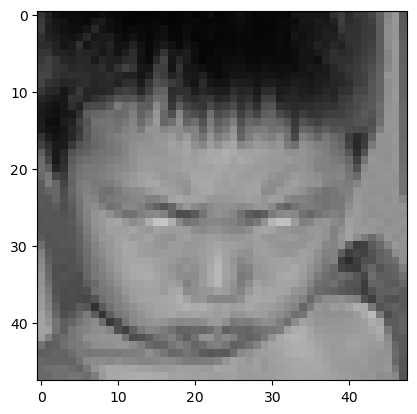

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

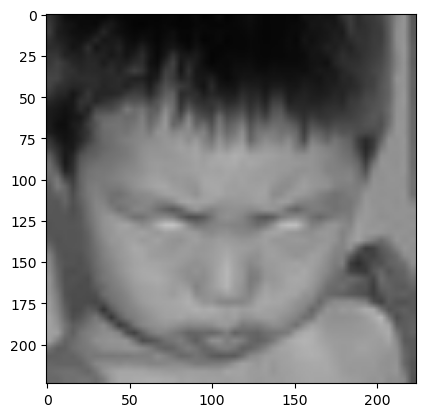

In [9]:
img_size= 224 #ImageNet => 224 X 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

In [10]:
new_array.shape

(224, 224, 3)

Read all the images and convert them to array

In [11]:
training_Data = []   # data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) #0 1 label
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
                

In [12]:
create_training_Data();

In [13]:
print(len(training_Data)) #we are just using training and deploying for real time webcam demo

28709


In [14]:
import random

random.shuffle(training_Data)

In [15]:
X = [] # data / feature
y = [] # Label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimenson    

In [16]:
X.shape

(28709, 224, 224, 3)

In [17]:
#normalize the data
#X = X/225.0; #We are normalizing it.
for i in range(0,28709):

    X[i] = X[i]/255.0

In [18]:
Y= np.array(y)

In [19]:
Y.shape

(28709,)

Deep Learning Model For Training - Transfer Learning

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = tf.keras.applications.MobileNetV2() 

In [22]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Transfer Learning - Tuning, Weights will start from last checkpoint

In [23]:
base_input = model.layers[0].input

In [24]:
base_output = model.layers[-2].output

In [25]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [26]:
final_output = layers.Dense(128)(base_output)  #adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output)  #activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)  #my classes are 07, classificaion layer

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [30]:
#new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [31]:
#new_model.fit(X,Y,epochs = 25) # training

In [32]:
#new_model.save('mark4.h5')

In [33]:
#new_model = tf.keras.models.load_model('mark4.h5')

In [34]:
new_model.evaluate 

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x00000274996C9B20>>

In [35]:
frame = cv2.imread("happy_woman.jpg")

In [36]:
frame.shape

(900, 637, 3)

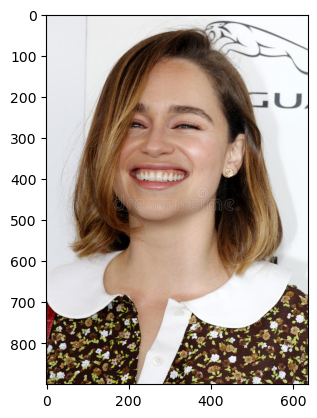

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [38]:
# We need face detection algorithm (It works on gray images, not rgb)

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(900, 637)

In [42]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h), (255,255,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("There is no face.")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

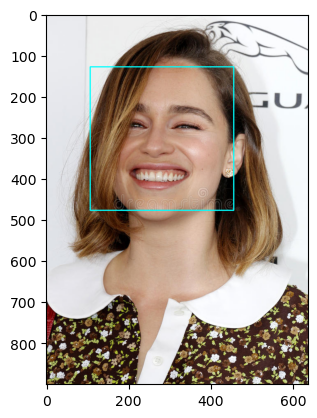

In [43]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

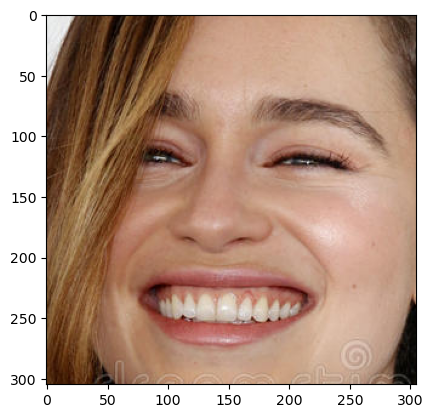

In [44]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [45]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0) #need fourth dimension
final_image = final_image/225.0 #normalizing

In [46]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [47]:
Predictions[0]

array([0.13381405, 0.1239194 , 0.08303067, 0.03900684, 0.13313934,
       0.04069965, 0.44639003], dtype=float32)

In [48]:
np.argmax(Predictions)

6

In [ ]:
cap = cv2.VideoCapture(1)
#Webcam acik mi?
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raiseIOError("Webcam acilamadi.")
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Yuz tespit edilmedi.")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew] #Yüzü kırpma
                
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)  #Dördüncü boyut
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    
     
    
    if (np.argmax(Predictions)==0):
        status = "Kizgin"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(Predictions)==1):
        status = "Igrenmis"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(Predictions)==2):
        status = "Korkmus"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
    
    elif (np.argmax(Predictions)==3):
        status = "Mutlu"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(Predictions)==4):
        status = "Ifadesiz"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(Predictions)==5):
        status = "Uzgun"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(Predictions)==6):
        status = "Saskin"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
        
    else:
        status = "İfadesiz"
        x1,y1,w1,h1 = 0,0,175,75
        #Siyah dörtgen çiz
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0), -1)
        #İfadeyi yaz
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255.0), 2)
        #Yüzü kare içine al
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255))
    
    cv2.imshow('Face Emotion Recognition',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
        

1/1 [==============================] - 0s 48ms/step
